In [75]:
import numpy as np
import pandas as pd

import entsoapi
# from entsoe import EntsoeRawClient
from entsoe import EntsoePandasClient

import datetime
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('dark_background')

client = EntsoePandasClient(api_key=entsoapi.mykey)
print(datetime.today())

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

2021-03-03 11:57:26.260292


# HUPX Árak 2021

In [76]:
start = pd.Timestamp('202103010000', tz='Europe/Brussels')
end = pd.Timestamp('202103312345', tz='Europe/Brussels')
country_code = 'HU'
hupxActual = client.query_day_ahead_prices(country_code, start=start,end=end)

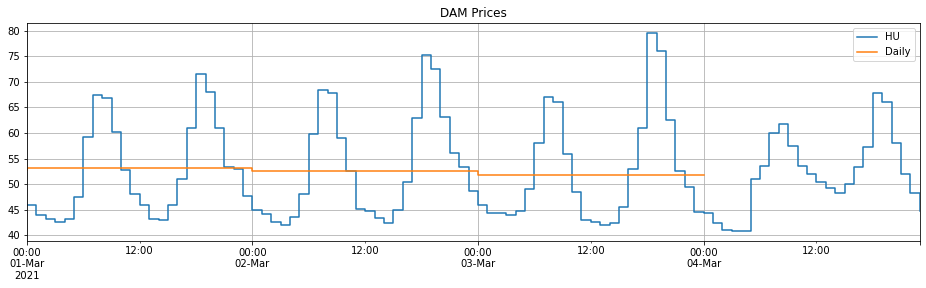

In [77]:
hupxActual.plot(title='DAM Prices', drawstyle='steps-post', label='HU')
x =hupxActual.resample('D').mean().plot(drawstyle='steps-pre',grid=True, figsize=(16,4), label='Daily')
plt.legend()
plt.grid(True)

In [78]:
hupxActual.resample('D').mean().round(2)

2021-03-01 00:00:00+01:00    52.74
2021-03-02 00:00:00+01:00    53.18
2021-03-03 00:00:00+01:00    52.60
2021-03-04 00:00:00+01:00    51.85
Freq: D, dtype: float64

# HUPX Árak 2020

In [79]:
start = pd.Timestamp('201601010000', tz='Europe/Brussels')
end = pd.Timestamp('201912312345', tz='Europe/Brussels')
country_code = 'HU'
hupx = client.query_day_ahead_prices(country_code, start=start,end=end)

In [80]:
print(hupx.describe().round(2))
print('Max HUPX DA ár: \t{}, {} EUR/MWh'.format(hupx.idxmax(), hupx.max()))
print('Min HUPX DA ár: \t{}, {} EUR/MWh'.format(hupx.idxmin(), hupx.min()))

count    35064.00
mean        46.78
std         20.25
min        -25.97
25%         33.32
50%         43.99
75%         57.82
max        300.10
dtype: float64
Max HUPX DA ár: 	2017-01-11 17:00:00+01:00, 300.1 EUR/MWh
Min HUPX DA ár: 	2018-01-01 05:00:00+01:00, -25.97 EUR/MWh


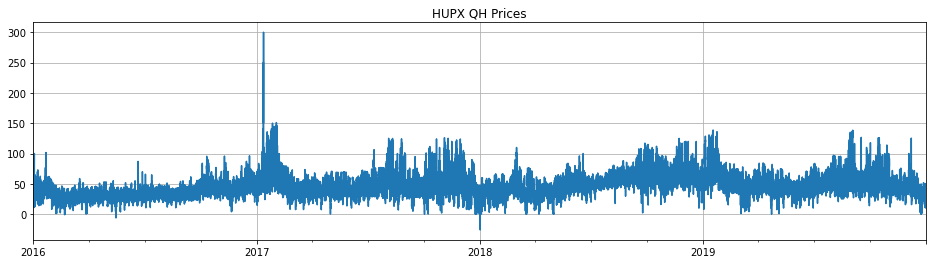

In [81]:
# Na lássuk a HUPX görbét
x = hupx.plot(title='HUPX QH Prices',grid=True, figsize=(16,4), drawstyle='steps-post')

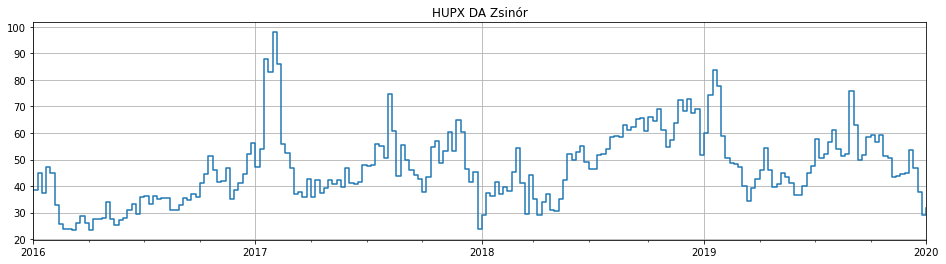

In [82]:
# Zsinórosítás: 24 óra átlaga azaz napi ár meghatározása
x = hupx.resample('W').mean()\
.plot(title='HUPX DA Zsinór',grid=True, figsize=(16,4), drawstyle='steps-post')

# Terhelési görbe

202102170000


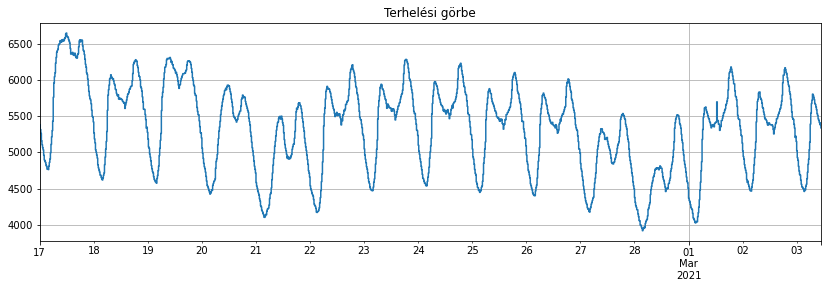

In [83]:
# gördüllő 2 hét vissza
today= datetime.today().strftime('%Y%m%d%H%M')
fromdate= datetime.today() - timedelta(days=14)
fromdate = fromdate.strftime('%Y%m%d0000')
print(fromdate)

start = pd.Timestamp(fromdate, tz='Europe/Brussels')
end = pd.Timestamp(today, tz='Europe/Brussels')
country_code = 'HU'
x=client.query_load(country_code, start=start,end=end)

c= x.plot(title='Terhelési görbe', grid=True, figsize=(14,4), drawstyle='steps-post')

In [86]:
start1 = pd.Timestamp('202001010000', tz='Europe/Brussels')
end1 = pd.Timestamp('202012312345', tz='Europe/Brussels')

start2 = pd.Timestamp('201901010000', tz='Europe/Brussels')
end2 = pd.Timestamp('201912312345', tz='Europe/Brussels')
country_code = 'HU' 

# Terhelési adatok lekérdezése
load_2020=client.query_load(country_code, start=start1,end=end1)
load_2019=client.query_load(country_code, start=start2,end=end2)

hupx_2020 = client.query_day_ahead_prices(country_code, start=start1,end=end1)
hupx_2019 = client.query_day_ahead_prices(country_code, start=start2,end=end2)

In [87]:
hupx_202010 = client.query_day_ahead_prices(country_code, start=start1,end=end1)
hupx_201910 = client.query_day_ahead_prices(country_code, start=start2,end=end2)

<AxesSubplot:title={'center':'Terhelési görbe 2020/2019'}>

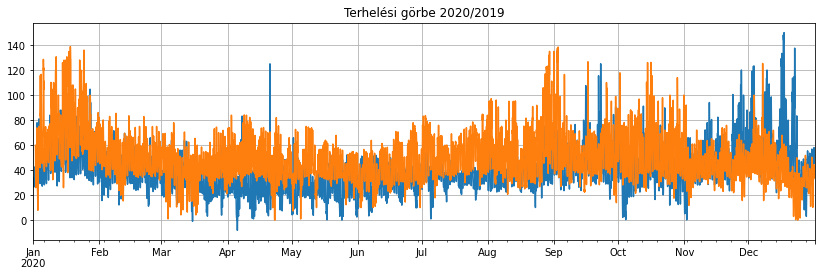

In [88]:
hupx_2020.plot(title='Terhelési görbe', grid=True, figsize=(14,4))
hupx_2019.shift(366, freq='D').plot(title='Terhelési görbe 2020/2019', grid=True, figsize=(14,4))

In [90]:
years = pd.DataFrame()
years['2019'] = hupx_2019.describe()
years['2020'] = hupx_2020.describe()
years['2019_load'] = load_2019.describe()
years['2020_load'] = load_2020.describe()
years.round(2)

,2019,2020,2019_load,2020_load
count,8760.00,8784.00,35034.00,35120.00
mean,50.36,39.00,4970.16,4884.65
std,18.81,17.58,705.01,779.29
min,0.00,-8.12,3175.00,2998.00
25%,37.38,27.84,4409.00,4307.00
50%,48.20,37.19,5058.00,4859.00
75%,60.47,47.46,5478.00,5433.00
max,138.82,150.02,6823.00,6820.00


Max Load: 	2019-12-05 16:15:00+01:00, 6823.0 MW
Min Load: 	2019-04-22 03:45:00+02:00, 3175.0 MW
Max Peak Load: 	2019-12-05 16:15:00+01:00, 6823.0 MW
Min Peak Load: 	2019-04-21 13:45:00+02:00, 3566.0 MW


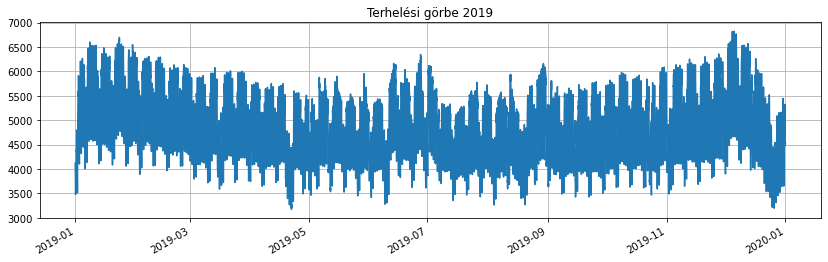

Max Load: 	2020-12-02 16:30:00+01:00, 6820.0 MW
Min Load: 	2020-06-01 05:30:00+02:00, 2998.0 MW
Max Peak Load: 	2020-12-02 16:30:00+01:00, 6820.0 MW
Min Peak Load: 	2020-04-12 13:45:00+02:00, 3361.0 MW


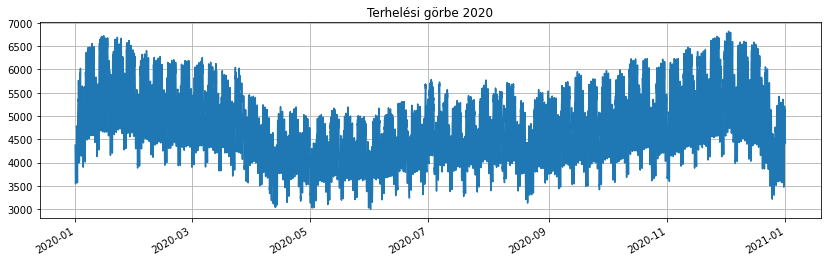

In [91]:
def showDetails(load, year):
    print('Max Load: \t{}, {} MW'.format(load.idxmax(), load.max()))
    print('Min Load: \t{}, {} MW'.format(load.idxmin(), load.min()))
    peak = load.between_time('08:00', '20:00')
    print('Max Peak Load: \t{}, {} MW'.format(peak.idxmax(), peak.max()))
    print('Min Peak Load: \t{}, {} MW'.format(peak.idxmin(), peak.min()))
    load.plot(title='Terhelési görbe '+year, grid=True, figsize=(14,4))
    plt.show()

showDetails(load_2019, '2019')
showDetails(load_2020, '2020')

## Tartamgörbe előállítása (2020 vs 2019)

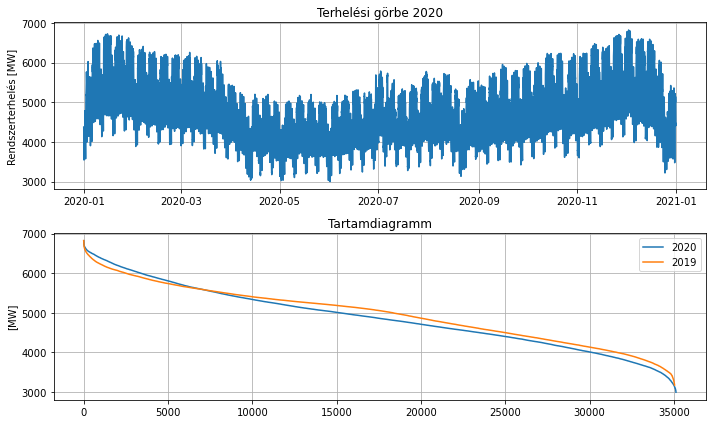

In [94]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])

plt.subplot(2,1,1)
plt.plot(load_2020)
plt.ylabel('Rendszerterhelés [MW]')
plt.grid(True)
plt.title('Terhelési görbe 2020')

plt.subplot(2,1,2)
plt.plot(load_2020.sort_values(ascending=False).to_list(), label='2020')
plt.plot(load_2019.sort_values(ascending=False).to_list(), label='2019')
plt.ylabel('[MW]')
plt.title('Tartamdiagramm')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Szezonalitás

<ipython-input-95-014c6ce940e4>:5: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  load_2019.tshift(365, freq='D').resample('W').max()\


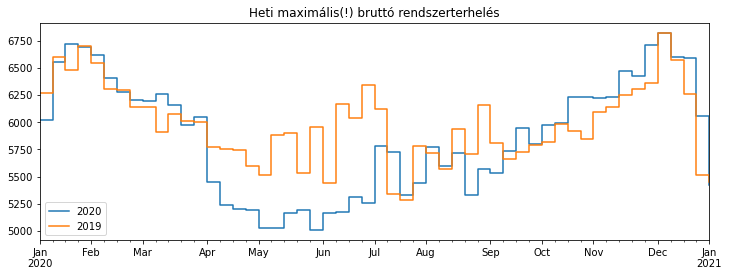

In [95]:
load_2020=load_2020.tz_localize(None)
load_2019=load_2019.tz_localize(None)
load_2020.resample('W').max().plot(figsize=(12,4), label='2020',drawstyle='steps-post')
# 2019-et eltolom 365 nappal jobbra
load_2019.tshift(365, freq='D').resample('W').max()\
.plot(figsize=(12,4), label='2019', drawstyle='steps-post')
plt.title('Heti maximális(!) bruttó rendszerterhelés')
x = plt.legend()

In [ ]:
start = pd.Timestamp('202010250000', tz='Europe/Brussels')
end = pd.Timestamp('202010260000', tz='Europe/Brussels')
country_code = 'HU' 
g = client.query_generation('HU', start=start,end=end, psr_type=None)

In [ ]:
g.iloc[0]

In [ ]:
g.columns

In [ ]:
igc = client.query_installed_generation_capacity('HU', start=start,end=end, psr_type=None)
igc.columns

In [ ]:
igc.T

## Napi terheléslefutások

In [97]:
today= datetime.today().strftime('%Y%m%d%H%M')
fromdate= datetime.today() - timedelta(days=2)
fromdate = fromdate.strftime('%Y%m%d0000')
start = pd.Timestamp(fromdate, tz='Europe/Brussels')
end = pd.Timestamp(today, tz='Europe/Brussels')
country_code = 'HU'
dfLoad =client.query_load(country_code, start=start,end=end)
dfGeneration=client.query_generation(country_code, start=start,end=end, psr_type=None)

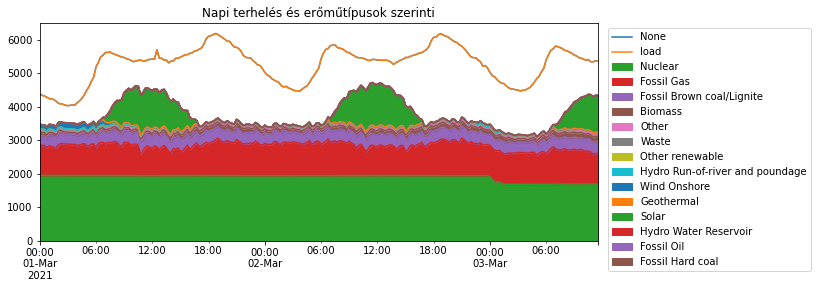

In [98]:
dfLoad.plot()
columns = dfGeneration.iloc[100].sort_values(ascending=False).index
ax= dfLoad.plot(label='load')
ax = dfGeneration[columns].abs().plot.area(stacked=True, figsize=(10,4), ax=ax)
plt.legend(bbox_to_anchor=(1.01,1), loc="upper left")
ax=plt.title('Napi terhelés és erőműtípusok szerinti')
# hupxActual.plot(title='DAM Prices', drawstyle='steps-post', label='HU', secondary_y=True)
# x =hupxActual.resample('D').mean().plot(drawstyle='steps-pre',grid=True, figsize=(10,4), label='Daily', secondary_y=True)
# plt.legend()
# plt.grid(True)

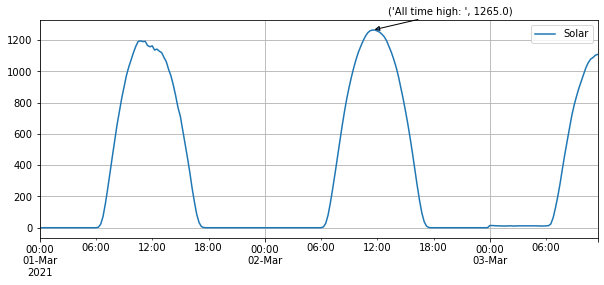

In [99]:
today= datetime.today().strftime('%Y%m%d%H%M')
fromdate= datetime.today() - timedelta(days=2)
fromdate = fromdate.strftime('%Y%m%d0000')
start = pd.Timestamp(fromdate, tz='Europe/Brussels')
end = pd.Timestamp(today, tz='Europe/Brussels')
country_code = 'HU'

# dfLoad =client.query_load(country_code, start=start,end=end)
dfSolar=client.query_generation(country_code, start=start,end=end, psr_type='B16',  )
ax= dfSolar.plot(figsize=(10,4), grid=True)
text = 'All time high: ',dfSolar.max()[0]
x=ax.annotate(text, xy=(dfSolar.idxmax()[0],dfSolar.max()), xytext=(15, 15), textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))

In [100]:
dfSolar.idxmax()[0]

Timestamp('2021-03-02 11:30:00+0100', tz='Europe/Budapest')

In [101]:
print('Max Solar: \t{}, {} MW'.format(dfSolar.idxmax(), dfSolar.max()))

Max Solar: 	Solar   2021-03-02 11:30:00+01:00
dtype: datetime64[ns, Europe/Budapest], Solar    1265.0
dtype: float64 MW


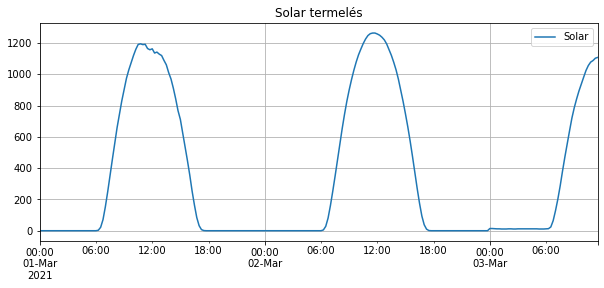

In [102]:
ax=dfSolar.plot(title='Solar termelés',figsize=(10,4), grid=True)

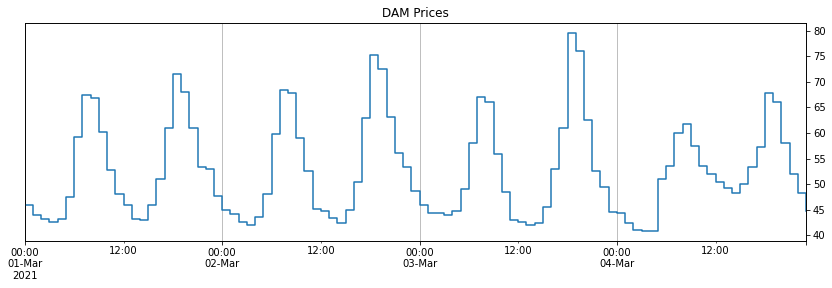

In [103]:
ax = hupxActual.plot(title='DAM Prices', drawstyle='steps-post', label='HUPX DAM', secondary_y=True, grid=True, figsize=(14,4))

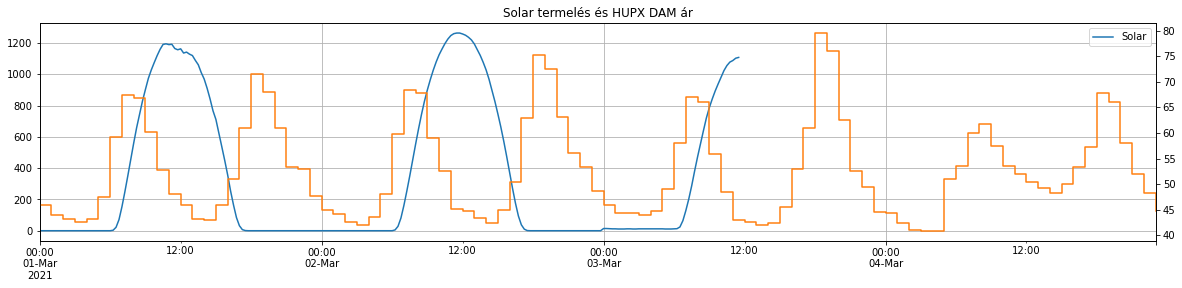

In [104]:
ax = dfSolar.plot(figsize=(10,4))
ax = hupxActual.plot(title='Solar termelés és HUPX DAM ár', drawstyle='steps-post', secondary_y=True, figsize=(20,4), grid=True, )

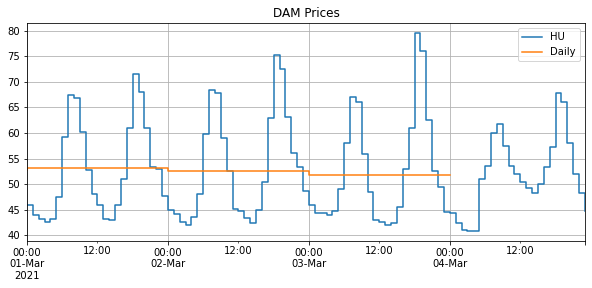

In [105]:
hupxActual.plot(title='DAM Prices', drawstyle='steps-post', label='HU')
x =hupxActual.resample('D').mean().plot(drawstyle='steps-pre',grid=True, figsize=(10,4), label='Daily')
plt.legend()
plt.grid(True)

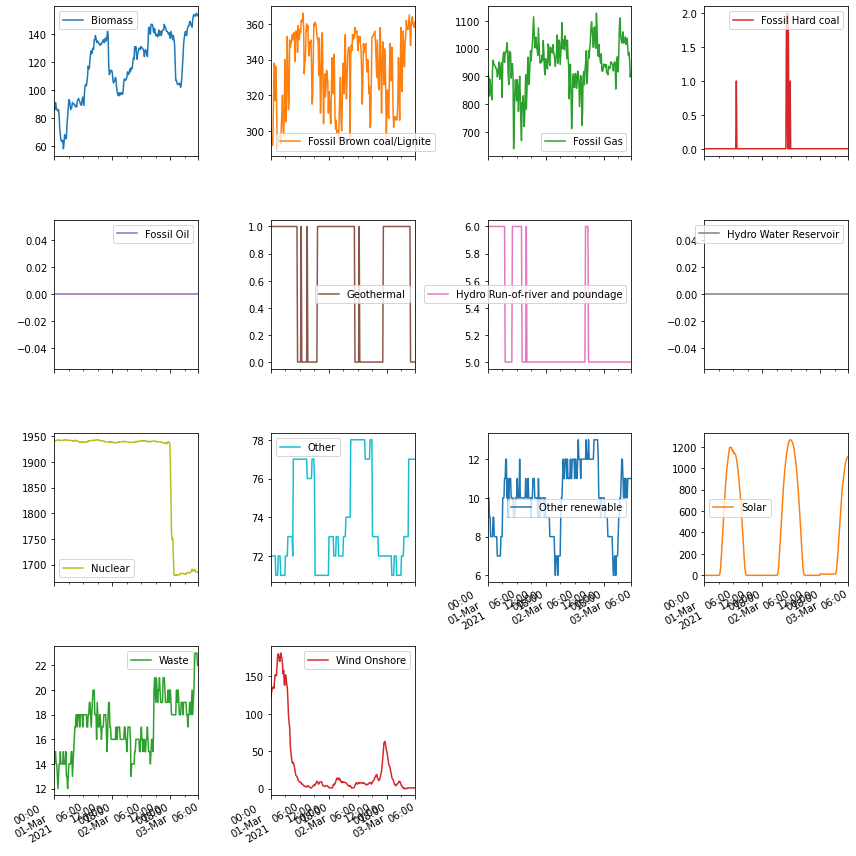

In [106]:
dfgp=dfGeneration.plot(subplots=True, layout=(4,4), figsize=(12,12), sharex=True)
plt.tight_layout()

<AxesSubplot:>

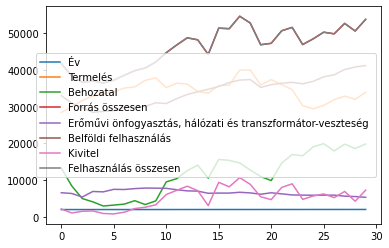

In [107]:
#KSH adatok
import pandas as pd

link ='http://www.ksh.hu/docs/hun/xstadat/xstadat_eves/xls/3_8_2i.xls'
kshData = pd.read_excel(link, skiprows=1 )
kshData.plot()

In [108]:
kshData.rename({'Erőművi önfogyasztás, hálózati és transzformátor-veszteség ': 'Önfogyasztás'})

,Év,Termelés,Behozatal,Forrás összesen,"Erőművi önfogyasztás, hálózati és transzformátor-veszteség",Belföldi felhasználás,Kivitel,Felhasználás összesen
0,1990,28436,13299,41735,6573,33010,2152,41735
1,1991,29963,8410,38373,6369,30945,1059,38373
2,1992,31685,4988,36673,5407,29745,1521,36673
3,1993,32915,4093,37008,6919,28470,1619,37008
4,1994,33515,2954,36469,6809,28740,920,36469
5,1995,34018,3210,37228,7503,28920,805,37228
6,1996,35090,3473,38563,7451,29836,1276,38563
7,1997,35397,4410,39807,7698,29848,2261,39807
8,1998,37190,3354,40544,7846,30084,2614,40544
9,1999,37832,4349,42181,7820,31075,3286,42181


In [109]:
kshData.columns

Index(['Év', 'Termelés', 'Behozatal', 'Forrás összesen',
       'Erőművi önfogyasztás, hálózati és transzformátor-veszteség ',
       'Belföldi felhasználás', 'Kivitel', 'Felhasználás összesen'],
      dtype='object')

In [110]:
link ='http://www.ksh.hu/docs/hun/xstadat/xstadat_eves/xls/3_8_2i.xls'
kshData = pd.read_excel(link, skiprows=1 )
kshData.head(3)

,Év,Termelés,Behozatal,Forrás összesen,"Erőművi önfogyasztás, hálózati és transzformátor-veszteség",Belföldi felhasználás,Kivitel,Felhasználás összesen
0,1990,28436,13299,41735,6573,33010,2152,41735
1,1991,29963,8410,38373,6369,30945,1059,38373
2,1992,31685,4988,36673,5407,29745,1521,36673


<AxesSubplot:xlabel='Év'>

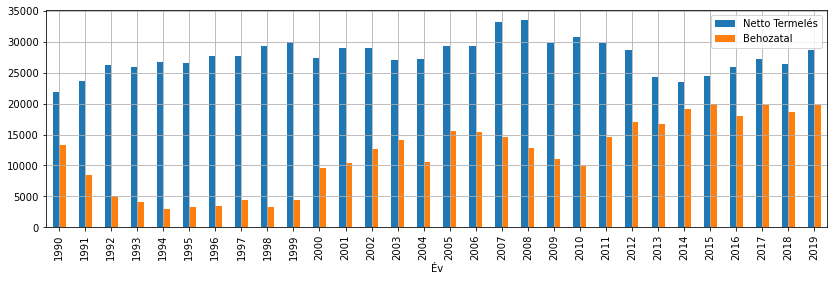

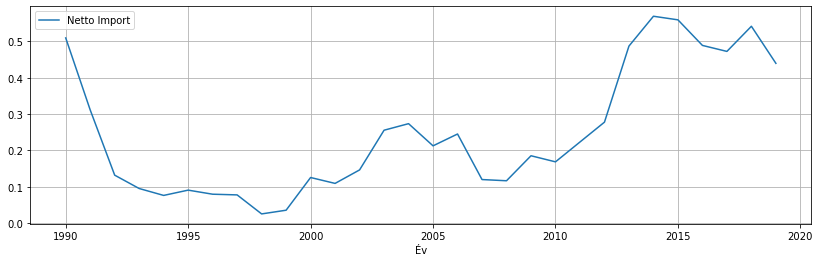

In [111]:
kshData['Netto Termelés'] = kshData.Termelés - kshData['Erőművi önfogyasztás, hálózati és transzformátor-veszteség ']
kshData['Import Szaldó'] = kshData.Behozatal - kshData.Kivitel
kshData['Netto Import'] = kshData['Import Szaldó'] / kshData['Netto Termelés']
kshData['Netto Import2'] = kshData['Import Szaldó'] / kshData['Netto Termelés']
kshData.plot(x='Év', y=['Netto Termelés', 'Behozatal'], figsize=(14,4), grid=True, kind='bar')
kshData.plot(x='Év', y=['Netto Import'], figsize=(14,4), grid=True)

## Magyarország bruttó rendszerterhelése és fogyasztása 2020 szeptember
Összehasonlításként a http://www.mekh.hu/download/4/e2/e0000/havi_piacmonitoring_riport_villamos_energia_2020_szeptember.pdf
04. ábárval

In [112]:
start = pd.Timestamp('202009010000', tz='Europe/Brussels')
end = pd.Timestamp('202009302345', tz='Europe/Brussels')
country_code = 'HU'
load =client.query_load(country_code, start=start,end=end)
# gen=client.query_generation(country_code, start=start,end=end, psr_type=None)

(4000.0, 6400.0)

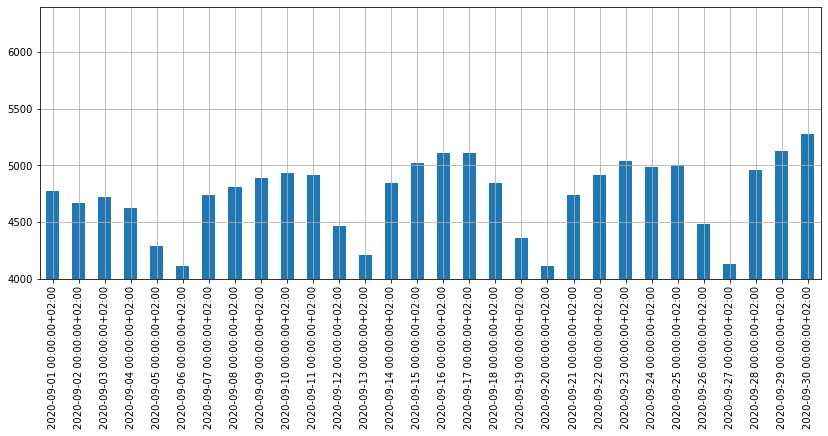

In [113]:
y = load.resample('D').mean().plot(kind='bar', figsize=(14,5), grid=True)
# y = load.resample('D').max().plot(kind='line', figsize=(14,5), grid=True)
y.set_ylim(4000,6400)

In [114]:
load

2020-09-01 00:00:00+02:00    4301.0
2020-09-01 00:15:00+02:00    4241.0
2020-09-01 00:30:00+02:00    4222.0
2020-09-01 00:45:00+02:00    4176.0
2020-09-01 01:00:00+02:00    4116.0
                              ...  
2020-09-30 21:45:00+02:00    5095.0
2020-09-30 22:00:00+02:00    5034.0
2020-09-30 22:15:00+02:00    5001.0
2020-09-30 22:30:00+02:00    4983.0
2020-09-30 22:45:00+02:00    4902.0
Length: 2869, dtype: float64

## Heti terhelési görbe (KW47: 2020.11.16-22)

In [115]:
start = pd.Timestamp('202011160000', tz='Europe/Brussels')
end = pd.Timestamp('202011230000', tz='Europe/Brussels')
country_code = 'HU'
hetiload =client.query_load(country_code, start=start,end=end)

<AxesSubplot:title={'center':'Heti Terhelési görbe \n KW47: 2020.11.16-22'}>

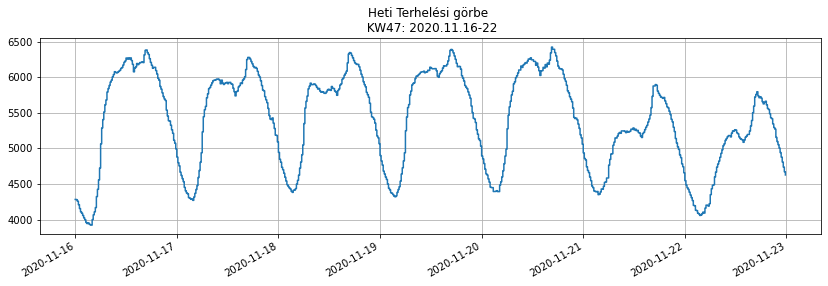

In [116]:
hetiload.plot(title='Heti Terhelési görbe \n KW47: 2020.11.16-22', grid=True, figsize=(14,4), drawstyle='steps-post')

<AxesSubplot:title={'center':'Heti Terhelési görbe \n 2018.feb.21-27'}>

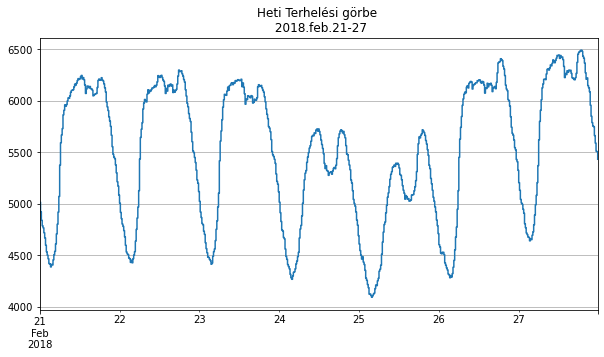

In [117]:
start = pd.Timestamp('201802210000', tz='Europe/Brussels')
end = pd.Timestamp('201802280000', tz='Europe/Brussels')
country_code = 'HU'
hetiload =client.query_load(country_code, start=start,end=end)
hetiload.plot(title='Heti Terhelési görbe \n 2018.feb.21-27', grid=True, figsize=(10,5), drawstyle='steps-post')

## Szezonalitás

In [ ]:
start = pd.Timestamp('201701010000', tz='Europe/Brussels')
end = pd.Timestamp('202012310000', tz='Europe/Brussels')
country_code = 'HU'
lt =client.query_load(country_code, start=start,end=end)
len(lt)

In [ ]:
lt.head()

In [ ]:
dflt = pd.DataFrame(lt)

In [ ]:
dflt

In [ ]:
dflt.index = dflt.index.tz_localize(None)

In [ ]:
dflt.resample('W').mean().plot()

In [ ]:
df_weekly = dflt.resample('W').mean()
x = df_weekly[df_weekly.index.year== 2017].plot()
df_weekly[df_weekly.index.year== 2018].plot(ax=x)
df_weekly[df_weekly.index.year== 2019].plot(ax=x)
df_weekly[df_weekly.index.year== 2020].plot(ax=x)

In [ ]:
pv = df_weekly.pivot_table(df_weekly, index=df_weekly.index.isocalendar().week, columns=df_weekly.index.year)
pv.plot(Title='Szezonálus fogyasztás hetente', figsize=(14,4), grid=True)

In [ ]:
df_weekly.pivot_table(df_weekly, index=df_weekly.index.month, columns=df_weekly.index.year)